In [1]:
#IMPORTING LIBRARIES

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout,Flatten

2024-03-02 06:26:07.111044: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 06:26:07.111192: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 06:26:07.257062: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### LOADING DATA

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### DATA RESHAPE

In [3]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [4]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train /=255
X_test /=255
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

### BUILD OPTIMIZER CALL

In [5]:
def build_optimizer(op):
    model=tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(28,28,1)))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu'))
    model.add(tf.keras.layers.MaxPool2D())
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=op, loss='binary_crossentropy', metrics=['accuracy'])
    return model

### COMPARING EACH OPTIMIZER ACCURACY

In [7]:
import os, gc

optimizers=['Adam', 'RMSprop','Adadelta', 'Adagrad',  'SGD']
opt_res=[]
model_res=[]
for i in optimizers:
    model=build_optimizer(i)
    print("Accuracy for: ",i)
    print("\n")
    history=model.fit(X_train,y_train, epochs=5, batch_size=64,verbose=1, validation_data=(X_test, y_test))
    print("\n")
    gc.collect()
    model_res.append(history)
    opt_res.append(history.history['accuracy'])

Accuracy for:  Adam


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.8167 - loss: 0.0992 - val_accuracy: 0.9815 - val_loss: 0.0103
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9837 - loss: 0.0110 - val_accuracy: 0.9893 - val_loss: 0.0067
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9885 - loss: 0.0076 - val_accuracy: 0.9889 - val_loss: 0.0070
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9920 - loss: 0.0058 - val_accuracy: 0.9900 - val_loss: 0.0066
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9937 - loss: 0.0042 - val_accuracy: 0.9912 - val_loss: 0.0057


Accuracy for:  RMSprop


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step - accuracy: 0.7934 - loss: 0.1095 - val_accuracy: 0.9810 - val_loss: 0.0106
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9780 - loss: 0.0140 - val_accuracy: 0.9865 - val_loss: 0.0077
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/

### PLOTTING OPTIMIZERS ACCURACY

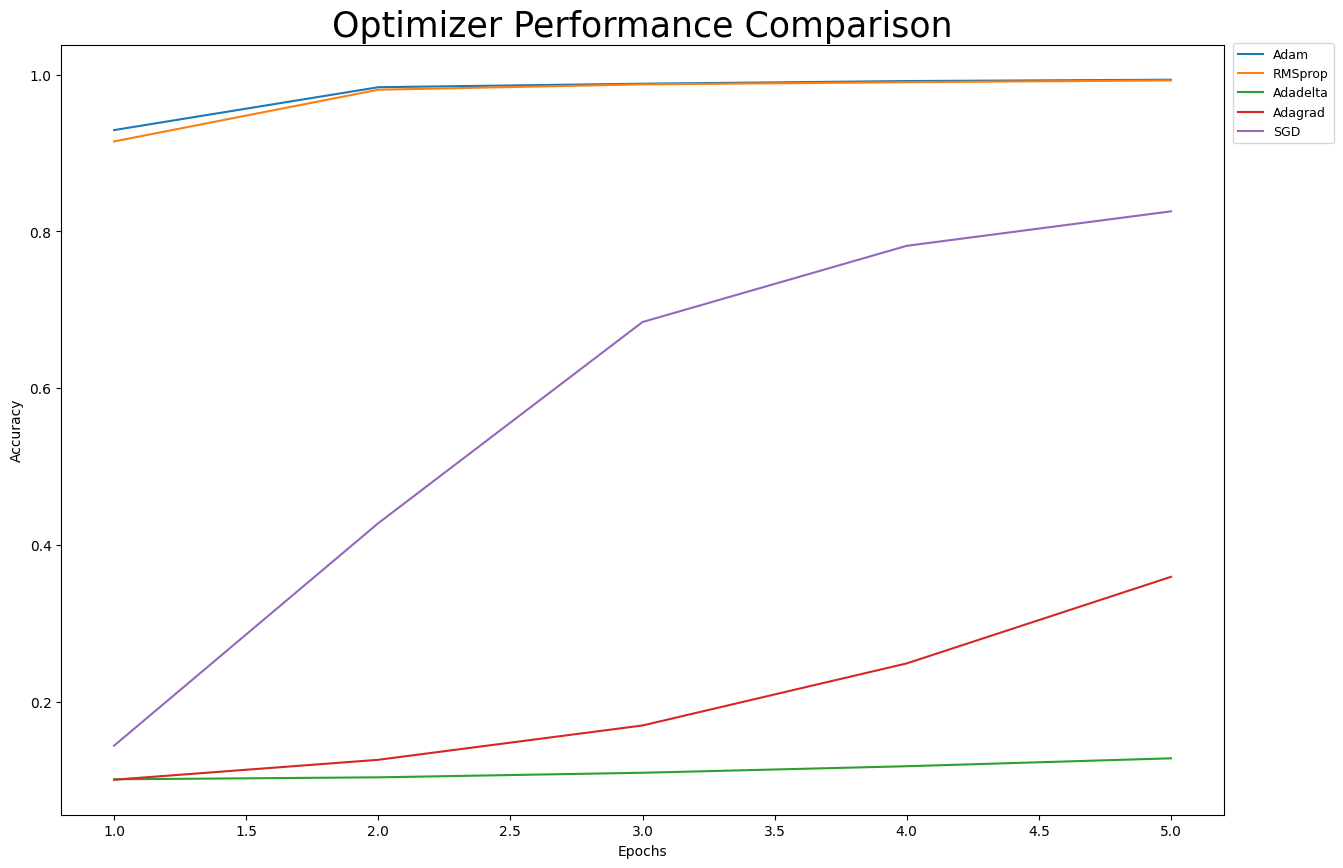

In [8]:
import matplotlib.pyplot as plt

fully_nested = [list(zip(*[(ix+1,y) for ix,y in enumerate(x)])) for x in opt_res]
names = ['sublist%d'%(i+1) for i in range(len(fully_nested))]

fig = plt.figure(figsize=(15,10))

for l in fully_nested:
    plt.plot(*l)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(optimizers, fontsize=9, loc = 'upper right', bbox_to_anchor=(1.1, 1.01))
plt.title("Optimizer Performance Comparison", fontsize=25)
plt.show()

Adam and RMSprop performed the best in terms of accuracy and loss reduction, with Adam being slightly better. Adadelta performed poorly, while Adagrad and SGD showed improvement over epochs but didn't reach the same level of performance as Adam and RMSprop within the given epochs.